The Monte Carlo approach to solve the gridworld task is somewhat naive but effective. Basically we can produce n simulations starting from random points of the grid, and let the robot move randomly to the four directions until a termination state is achieved. 

For each simulation we save the 4 values: 

(1) the initial state, (2) the action taken, (3) the reward received and (4) the final state. 

In the end, a simulation is just an array containing x arrays of these values, x being the number of steps the robot had to take until reaching a terminal state.

Now, from these simulations, we iterate from the end of the “experience” array, and compute G as the previous state value in the same experience (weighed by gamma, the discount factor) plus the received reward in that state. We then store G in an array of Returns(St). 

Finally, for each state we compute the average of the Returns(St) and we set this as the state value at a particular iteration.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


# First-visit Monte Carlo

In [3]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
# numIterations = 10000

In [4]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [5]:
states

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

In [6]:
states[1:-1]

[[0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2]]

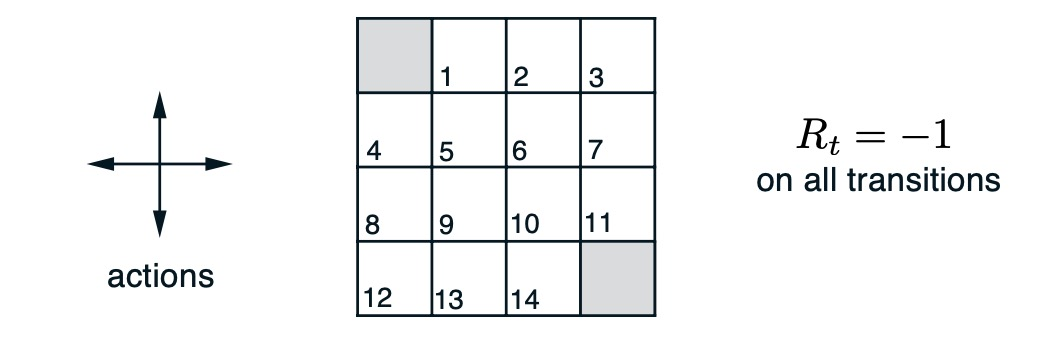

In [7]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
      
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [22]:
episode = generateEpisode()

In [33]:
episode[::-1]

[[[1, 0], [-1, 0], -1, [0, 0]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]],
 [[1, 1], [0, -1], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]],
 [[2, 0], [-1, 0], -1, [1, 0]],
 [[2, 0], [0, -1], -1, [2, 0]],
 [[2, 0], [0, -1], -1, [2, 0]],
 [[3, 0], [-1, 0], -1, [2, 0]],
 [[3, 1], [0, -1], -1, [3, 0]],
 [[3, 2], [0, -1], -1, [3, 1]],
 [[3, 1], [0, 1], -1, [3, 2]],
 [[2, 1], [1, 0], -1, [3, 1]],
 [[3, 1], [-1, 0], -1, [2, 1]],
 [[3, 1], [1, 0], -1, [3, 1]],
 [[2, 1], [1, 0], -1, [3, 1]],
 [[2, 0], [0, 1], -1, [2, 1]],
 [[2, 1], [0, -1], -1, [2, 0]],
 [[2, 2], [0, -1], -1, [2, 1]],
 [[3, 2], [-1, 0], -1, [2, 2]]]

In [36]:
episode[::]

[[[2, 0], [0, -1], -1, [2, 0]],
 [[2, 0], [-1, 0], -1, [1, 0]],
 [[1, 0], [0, 1], -1, [1, 1]],
 [[1, 1], [1, 0], -1, [2, 1]],
 [[2, 1], [0, 1], -1, [2, 2]],
 [[2, 2], [1, 0], -1, [3, 2]],
 [[3, 2], [-1, 0], -1, [2, 2]],
 [[2, 2], [0, -1], -1, [2, 1]],
 [[2, 1], [0, -1], -1, [2, 0]],
 [[2, 0], [-1, 0], -1, [1, 0]],
 [[1, 0], [1, 0], -1, [2, 0]],
 [[2, 0], [-1, 0], -1, [1, 0]],
 [[1, 0], [0, -1], -1, [1, 0]],
 [[1, 0], [0, -1], -1, [1, 0]],
 [[1, 0], [-1, 0], -1, [0, 0]]]

# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

for it in tqdm(range(numIterations)): # disable=True
    episode = generateEpisode()
    G = 0
#     print(episode)
    for i, step in enumerate(episode[::-1]):  # ::-1 means desending order
        print("G = %s -> "%(str(G)), end='')
        G = gamma*G + step[2]*1.0  # return of state, step[2] means the reward, then G is Accum Reward
        print("%s"%(str(G)), end='\n')
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.average(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue
            print("x=%d, y=%d, \n%s" % (idx[0], idx[1], str(V)))

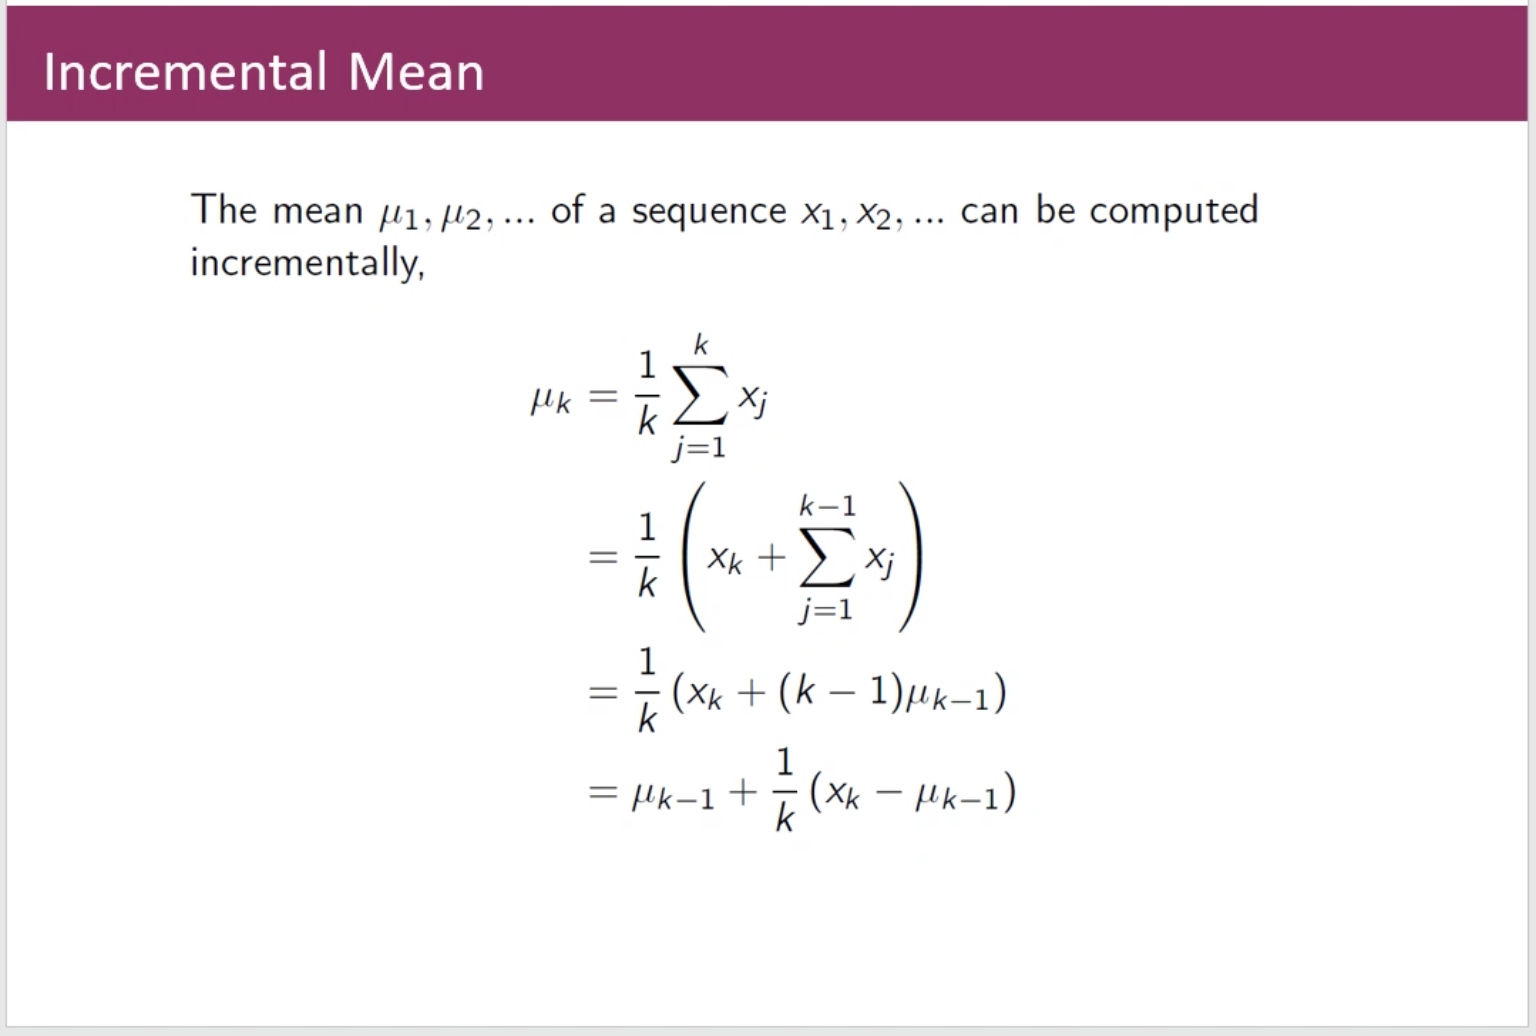

In [14]:
gamma

0.6

In [15]:
G

-2.4580095999999996

In [16]:
step[2]

-1

In [17]:
idx

(1, 0)

In [18]:
returns[idx]

[-1.0,
 -1.0,
 -1.0,
 -1.96,
 -2.4300159999999997,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.6,
 -1.96,
 -2.4300159999999997,
 -1.0,
 -1.0,
 -1.0,
 -1.96,
 -1.0,
 -1.0,
 -1.6,
 -2.4998476600649973,
 -2.499908596038998,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -2.4999999907170176,
 -1.0,
 -1.0,
 -1.6,
 -2.4300159999999997,
 -2.4848834559999995,
 -2.4909300735999995,
 -1.0,
 -2.3056,
 -2.3833599999999997,
 -2.4748057599999997,
 -2.4848834559999995,
 -2.4909300735999995,
 -1.0,
 -1.6,
 -2.4999802567444234,
 -2.4980408958975997,
 -1.0,
 -1.0,
 -2.4580095999999996,
 -1.0,
 -1.0,
 -2.3833599999999997,
 -1.0,
 -2.4909300735999995,
 -2.4300159999999997,
 -2.4300159999999997,
 -2.4748057599999997,
 -1.0,
 -1.0,
 -2.4580095999999996,
 -2.4848834559999995,
 -1.0,
 -2.4748057599999997,
 -2.4995768335138813,
 -2.499945157623399,
 -1.0,
 -1.0,
 -1.6,
 -1.0,
 -2.4909300735999995,
 -2.4945580441599997,
 -1.96,
 -1.0,
 -1.6,
 -2.4998476600649973,
 -1.0,
 -1.0,
 -2.499945157623399,
 -1.0,
 -1.0,
 -1.6,
 -1.96,
 -1.0,


In [19]:
step[0][0]

2

In [20]:
step[0][1]

2

In [21]:
idx[0]

1

In [22]:
idx[1]

0

In [23]:
newValue

-1.6437877959556195

In [24]:
V

array([[ 0.        , -1.633718  , -2.2125571 , -2.38132729],
       [-1.6437878 , -2.10045779, -2.27421716, -2.2163113 ],
       [-2.22318084, -2.2783704 , -2.10107616, -1.63918196],
       [-2.38611138, -2.22113687, -1.64341568,  0.        ]])

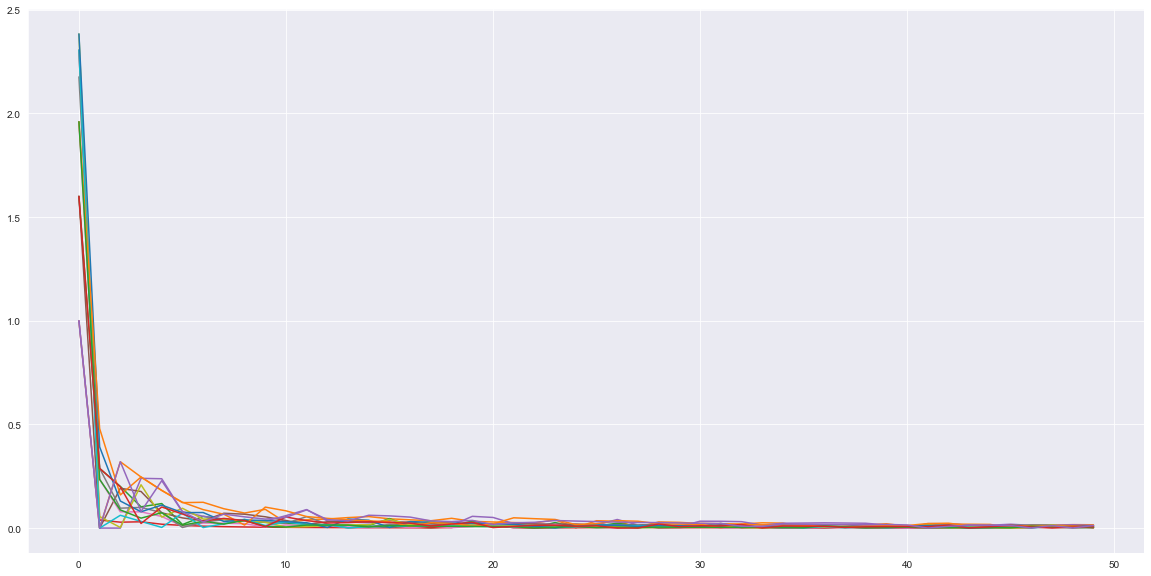

In [25]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

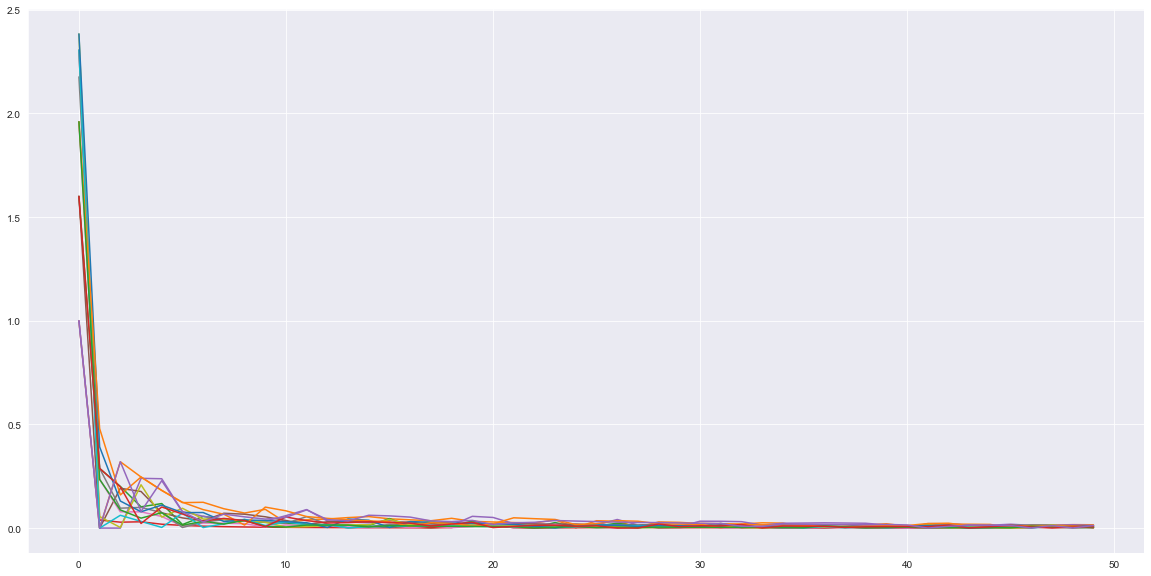

In [26]:
# using gamma = 0.6
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

Note that varying the gamma can decrease the convergence time as we can see in the last two plots using gamma=1 and gamma=0.6. The good side of this approach is that:

Technically, we don’t have to compute all the state-values for all the states if we don’t want. We could just focus on a particular grid point and start all the simulations from that initial state to sample episodes that include that state, ignoring all others. This can radically decrease the computational expense.

As I said before, this approach does not require a full understanding of the environment dynamics and we can learn directly from experience or simulation.